In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras.datasets import imdb

In [38]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

In [39]:
from tensorflow.keras.preprocessing import sequence

In [41]:
x_train=sequence.pad_sequences(x_train,maxlen=100)

In [42]:
from tensorflow.keras import models,layers

In [45]:
from tensorflow.keras import regularizers

In [44]:
model=models.Sequential()

In [46]:
model.add(layers.Embedding(10000,64,input_length=100))
model.add(layers.LSTM(32,recurrent_dropout=0.2,dropout=0.2,kernel_regularizer=regularizers.l1_l2(l1=0.05,l2=0.05),
                     return_sequences=True,activation="relu"))
model.add(layers.LSTM(64,recurrent_dropout=0.1,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [49]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(),metrics=["acc"])

In [50]:
with tf.device("/gpu:0"):
    history=model.fit(x_train,y_train,epochs=15,batch_size=300,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 20s 993us/sample - loss: 729716109786.1104 - acc: 0.5854 - val_loss: 26.5989 - val_acc: 0.7330
Epoch 2/15
20000/20000 [==============================] - 14s 675us/sample - loss: 4131.1346 - acc: 0.6870 - val_loss: 26.5886 - val_acc: 0.7172
Epoch 3/15
20000/20000 [==============================] - 13s 669us/sample - loss: 77447.9989 - acc: 0.6765 - val_loss: 26.5985 - val_acc: 0.6276
Epoch 4/15
20000/20000 [==============================] - 14s 676us/sample - loss: 1153.6752 - acc: 0.6550 - val_loss: 26.5814 - val_acc: 0.6348
Epoch 5/15
20000/20000 [==============================] - 13s 672us/sample - loss: 4789.4498 - acc: 0.6540 - val_loss: 26.6005 - val_acc: 0.6436
Epoch 6/15
20000/20000 [==============================] - 14s 682us/sample - loss: 46.8450 - acc: 0.6780 - val_loss: 26.3764 - val_acc: 0.6684
Epoch 7/15
20000/20000 [==============================] - 14s 679us/sample

In [56]:
model_2=models.Sequential()
model_2.add(layers.Embedding(10000,64,input_length=100))
model_2.add(layers.Bidirectional(layers.LSTM(32,recurrent_dropout=0.2,dropout=0.2,kernel_regularizer=regularizers.l1(0.3),
                                          activation="relu")))
model_2.add(layers.Dense(1,activation="sigmoid"))

In [57]:
model_2.compile(loss="binary_crossentropy",optimizer=optimizers.Adadelta(),metrics=["acc"])

In [58]:
with tf.device("/gpu:0"):
    history_2=model_2.fit(x_train,y_train,epochs=35,batch_size=300,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/35
20000/20000 [==============================] - 14s 691us/sample - loss: 439.0517 - acc: 0.5020 - val_loss: 438.7887 - val_acc: 0.4954
Epoch 2/35
20000/20000 [==============================] - 11s 535us/sample - loss: 438.5242 - acc: 0.5016 - val_loss: 438.2432 - val_acc: 0.4954
Epoch 3/35
20000/20000 [==============================] - 11s 539us/sample - loss: 437.9627 - acc: 0.5025 - val_loss: 437.6656 - val_acc: 0.4952
Epoch 4/35
20000/20000 [==============================] - 11s 535us/sample - loss: 437.3702 - acc: 0.5022 - val_loss: 437.0576 - val_acc: 0.4958
Epoch 5/35
20000/20000 [==============================] - 11s 536us/sample - loss: 436.7480 - acc: 0.5016 - val_loss: 436.4211 - val_acc: 0.4960
Epoch 6/35
20000/20000 [==============================] - 11s 539us/sample - loss: 436.0981 - acc: 0.5017 - val_loss: 435.7574 - val_acc: 0.4958
Epoch 7/35
20000/20000 [==============================] - 11s 560us/sample - loss

In [59]:
model.save("LSTM.h5")
model_2.save("bidirectional.h5")

In [60]:
from tensorflow.keras.utils import plot_model

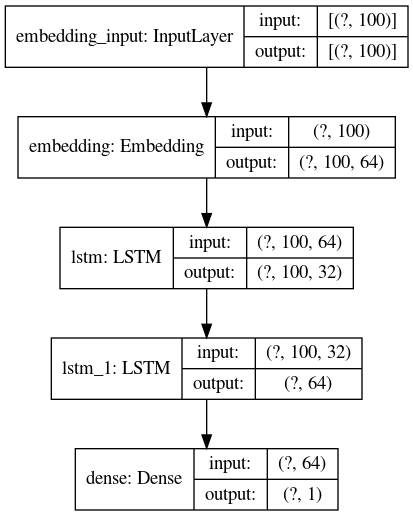

In [62]:
plot_model(model,show_shapes=True)

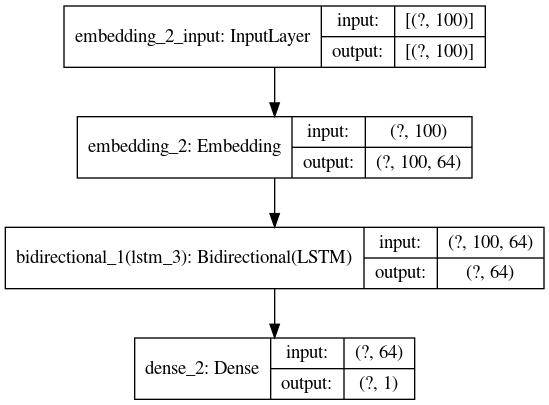

In [63]:
plot_model(model_2,show_shapes=True)

In [64]:
import matplotlib.pyplot as plt

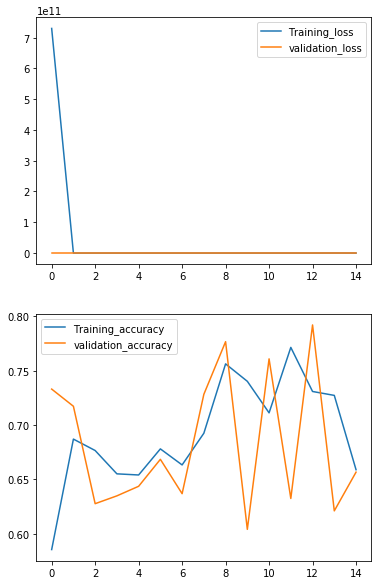

In [73]:
data=history.history
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
plt.plot(np.arange(15),data["loss"],label="Training_loss")
plt.plot(np.arange(15),data["val_loss"],label="validation_loss")
plt.legend()
plt.subplot(2,1,2)
plt.plot(np.arange(15),data["acc"],label="Training_accuracy")
plt.plot(np.arange(15),data["val_acc"],label="validation_accuracy")
plt.legend()

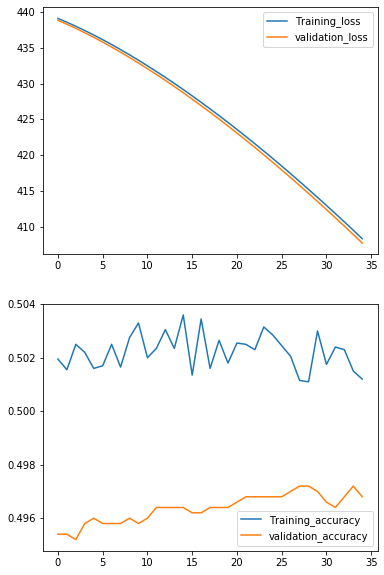

In [74]:
data_2=history_2.history
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
plt.plot(np.arange(35),data_2["loss"],label="Training_loss")
plt.plot(np.arange(35),data_2["val_loss"],label="validation_loss")
plt.legend()
plt.subplot(2,1,2)
plt.plot(np.arange(35),data_2["acc"],label="Training_accuracy")
plt.plot(np.arange(35),data_2["val_acc"],label="validation_accuracy")
plt.legend()

#no change in training and validation